#1. Background

EliteShoppers.com is an established e-commerce company operating through both a mobile app and a website. The client’s analytics team has observed that customers exhibit different usage behaviors across platforms, which seems to influence their annual spending.

To make data-driven decisions on where to focus future development and marketing investments (mobile app or website), the company has shared anonymized user data with you as a Data Scientist at Analytica Insights for a comprehensive regression-based analysis and predictive modeling exercise.


##Business Objective

The goal of this project is to:
Develop a regression model that predicts each customer’s Yearly Amount Spent based on their behavior and engagement metrics.


Analyze whether mobile app usage or website activity contributes more significantly to customer spending.


Provide data-backed recommendations on whether the company should prioritize improvements in the app or website to maximize annual spending.




#Data Dictionary

| **Column Name**          | **Description**                                                |
| ------------------------ | -------------------------------------------------------------- |
| **Email**                | Unique customer identifier                                     |
| **Address**              | Customer’s physical address                                    |
| **Avatar**               | Categorical variable (visual representation)                   |
| **Avg. Session Length**  | Average duration (in minutes) per session                      |
| **Time on App**          | Average time (in minutes) spent on the mobile app              |
| **Time on Website**      | Average time (in minutes) spent on the website                 |
| **Length of Membership** | Total number of years the customer has been active             |
| **Yearly Amount Spent**  | Total amount spent by the customer in a year (Target variable) |


#Importing required libraries and packages

In [2]:
path = '/content/drive/MyDrive/Future Data Scientist  and AI Engineer/Ecommerce Customers.txt'

import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_absolute_error,mean_absolute_percentage_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

#Phase 1: Data Understanding and Cleaning

Import the dataset and verify column data types.


Check for missing values, duplicates, and inconsistent formats.


Decide on these columns  (Email, Address, Avatar).


Handle any anomalies (e.g., negative or unrealistic values).


Generate descriptive statistics for all numerical variables.


In [3]:
df = pd.read_csv(path)
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
df.dtypes

,0
Email,object
Address,object
Avatar,object
Avg. Session Length,float64
Time on App,float64
Time on Website,float64
Length of Membership,float64
Yearly Amount Spent,float64


In [5]:
df.shape

(500, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [7]:
df.isna().sum()

,0
Email,0
Address,0
Avatar,0
Avg. Session Length,0
Time on App,0
Time on Website,0
Length of Membership,0
Yearly Amount Spent,0


In [8]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [9]:
df[df.duplicated()]

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent


In [10]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [11]:
df.drop(['Email', 'Address', 'Avatar'],axis=1,inplace=True)

In [12]:
df.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


In [13]:
num_cols = df.select_dtypes('number').columns.tolist()
num_cols

['Avg. Session Length',
 'Time on App',
 'Time on Website',
 'Length of Membership',
 'Yearly Amount Spent']

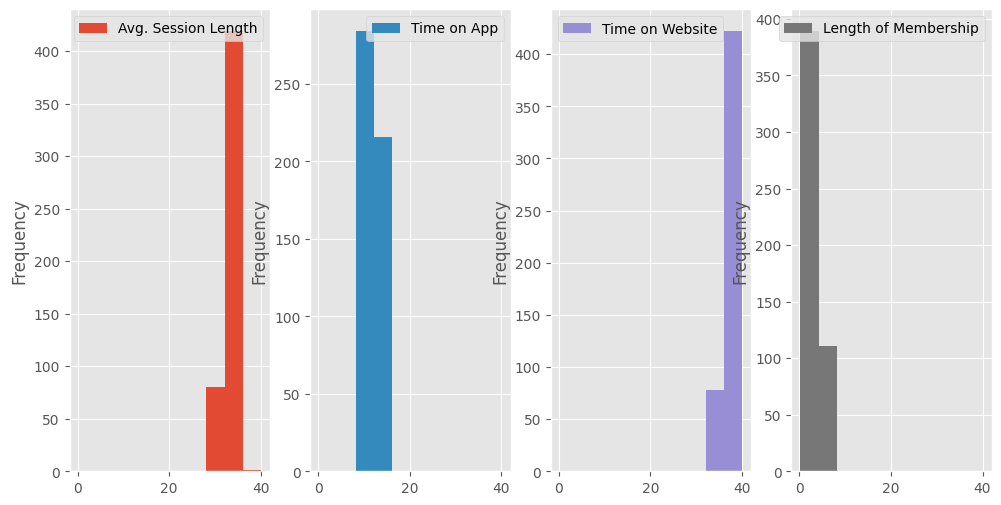

In [14]:
df[num_cols[0:4]].plot(kind='hist',subplots=True,layout = (1,5),figsize = (15,6))
plt.show()

In [15]:
num_cols

['Avg. Session Length',
 'Time on App',
 'Time on Website',
 'Length of Membership',
 'Yearly Amount Spent']

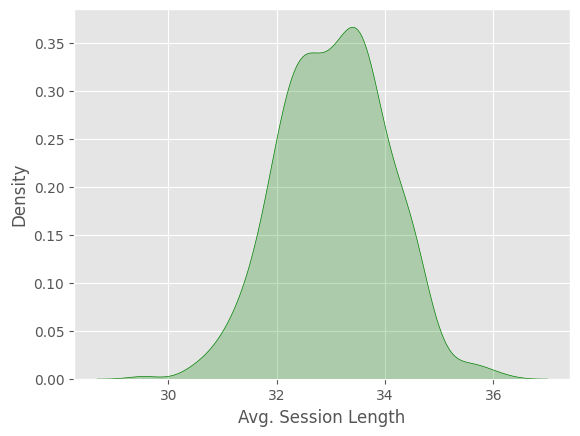

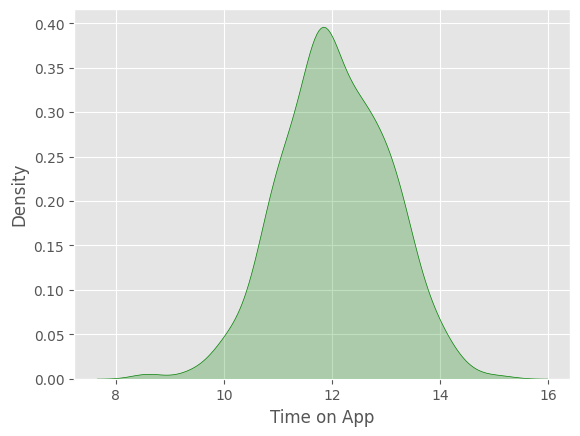

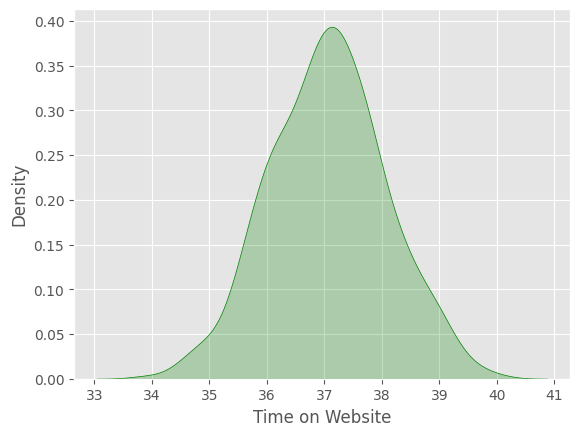

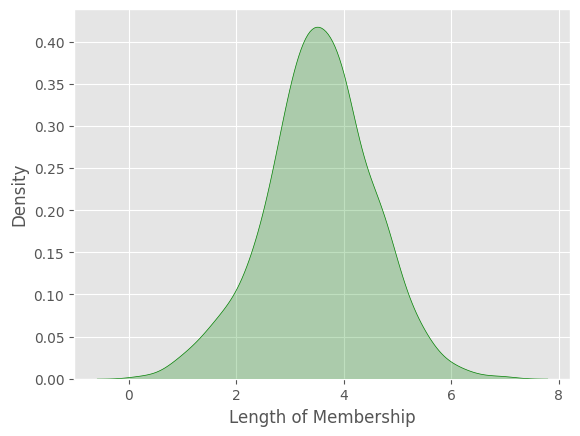

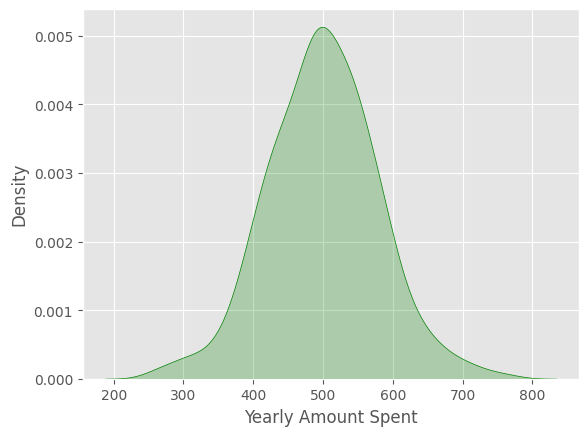

In [16]:
for col in num_cols:
  sns.kdeplot(df[col],color='g',fill=True)
  plt.show()

- looking at the kde plots we can see the columns look pretty normal in distribution

In [17]:
df[num_cols].skew()

,0
Avg. Session Length,-0.032175
Time on App,-0.089121
Time on Website,0.012142
Length of Membership,-0.106608
Yearly Amount Spent,0.034790


In [18]:
df[num_cols].kurtosis()

,0
Avg. Session Length,0.011862
Time on App,0.125081
Time on Website,-0.098287
Length of Membership,0.349010
Yearly Amount Spent,0.463976


- looking at the skewness and kurtosis of the columns we can say the columns are not skewed and dont posses any kurtosis

#Checkin for Outliers using Boxplots for visual Analysis and IQR

In [19]:
num_cols

['Avg. Session Length',
 'Time on App',
 'Time on Website',
 'Length of Membership',
 'Yearly Amount Spent']

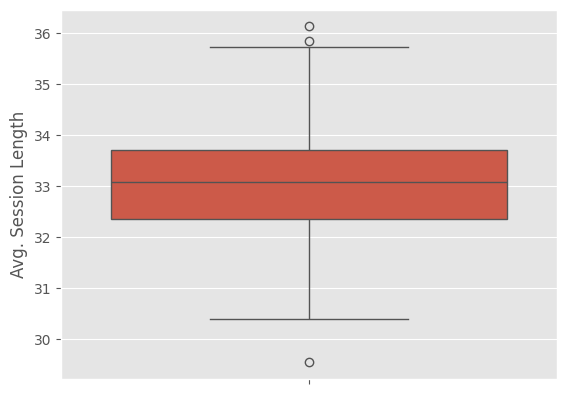

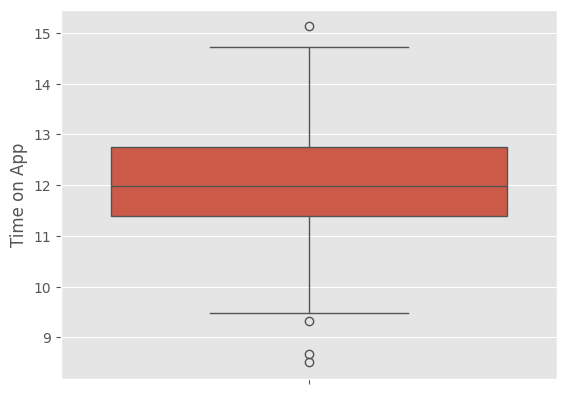

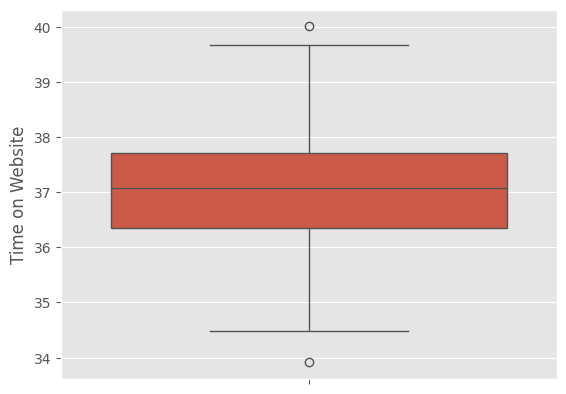

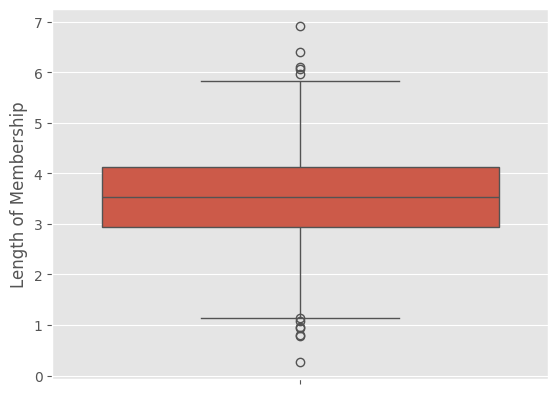

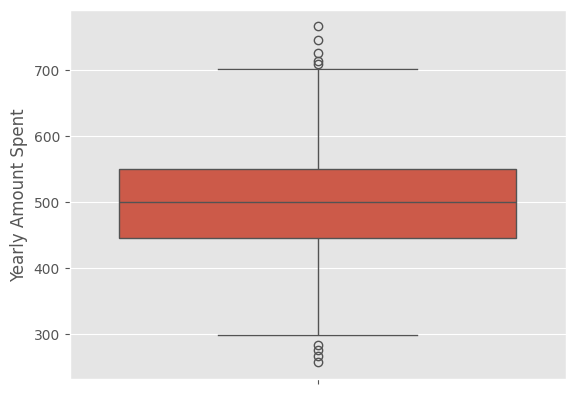

In [20]:
for col in num_cols:
  sns.boxplot(df[col])
  plt.show()

- as it can be seen clearly from the above given boxplots we have outliers in some quantity so we need to eliminate them by using IQR Rule

In [21]:

indexes = []
for col in num_cols:
  q1 =  np.percentile(df[col],25)
  q3 =  np.percentile(df[col],75)
  iqr = q3-q1
  lb = q1-1.5*iqr
  ub = q3+1.5*iqr
  idx = df[(df[col]<lb)  |  (df[col]>ub)].index.tolist()
  indexes.extend(idx)


In [22]:
df.shape

(500, 5)

In [23]:
len(list(set(indexes)))

indexes_to_be_removed = list(set(indexes))

In [24]:
df.drop(indexes_to_be_removed,axis=0,inplace=True)

In [25]:
df.shape

(476, 5)

#Phase 2: In-depth Exploratory Data Analysis (EDA)


In [26]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,476.000000,476.000000,476.000000,476.000000,476.000000
mean,33.038480,12.070058,37.070230,3.546969,500.526057
std,0.944913,0.955539,0.995378,0.899340,69.774424
min,30.393185,9.477778,34.476878,1.139094,319.928870
25%,32.341822,11.397351,36.365194,2.966044,448.312776
50%,33.077133,11.995167,37.075583,3.535445,501.111368
75%,33.700522,12.766691,37.716432,4.118402,548.339872
max,35.630854,14.715388,39.672591,5.840506,700.917092


#Correlation Analysis

Compute and interpret Pearson and Spearman correlation coefficients.


Create a heatmap of correlations (annotated) to highlight relationships with the target variable.


Pay particular attention to correlations between:


Time on App and Yearly Amount Spent


Time on Website and Yearly Amount Spent

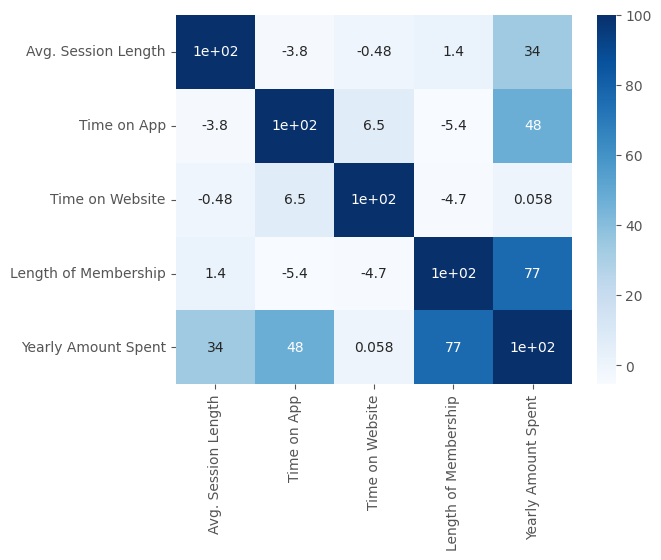

In [27]:
sns.heatmap(df.corr()*100,annot=True,cmap='Blues')
plt.show()

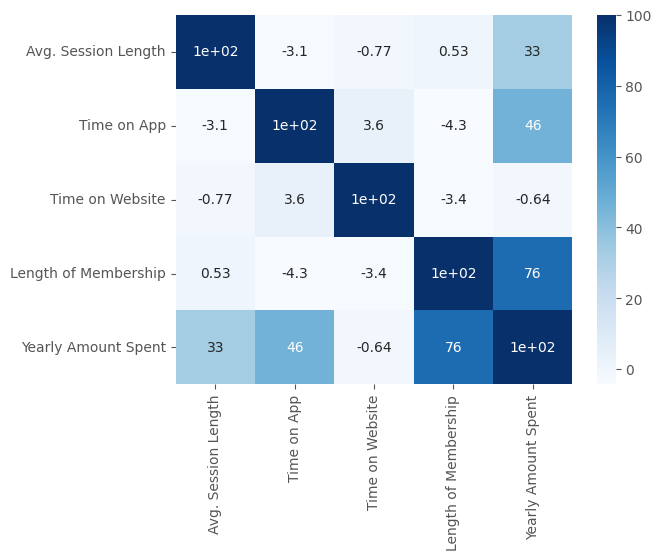

In [28]:
sns.heatmap(df.corr(method = 'spearman')*100,annot=True,cmap='Blues')
plt.show()

- looking at the heatmaps for correlations its clear that time on app has a very significant impact on the yearly amount spent that is 48 percent while as time on website shows very poor weak correlation with it

- Hence we say the app is the best thing to look at in the future

In [29]:
df.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


#Visual Analysis

Use a combination of visual tools to uncover relationships:

- Scatterplots: Between all features and target variable.


- Bar Plots: For aggregated spending trends.


- Pairplots: To visualize pairwise relationships among features.


- Joint Plots: Between key continuous variables and target variable (e.g., App time vs. Spending).


- Hexplots: To show high-density regions of spending behavior.


- Boxplots: For distribution comparison and variance understanding.


In [30]:
num_cols

['Avg. Session Length',
 'Time on App',
 'Time on Website',
 'Length of Membership',
 'Yearly Amount Spent']

In [31]:
features = num_cols[:-1]
target =  'Yearly Amount Spent'

features

['Avg. Session Length',
 'Time on App',
 'Time on Website',
 'Length of Membership']

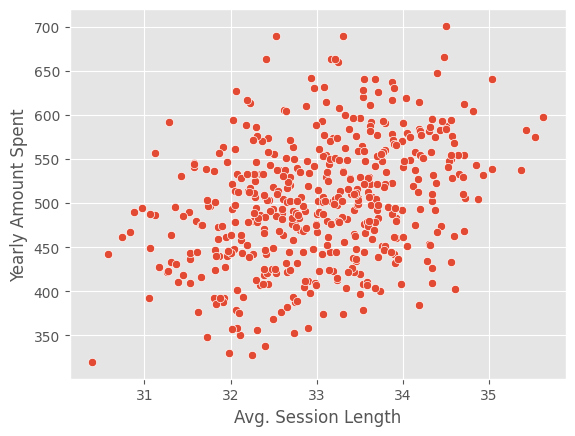

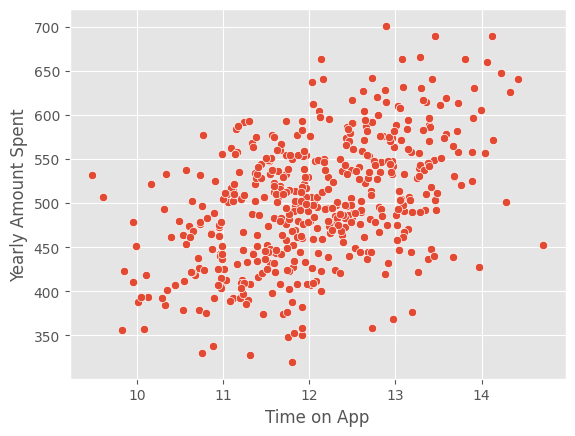

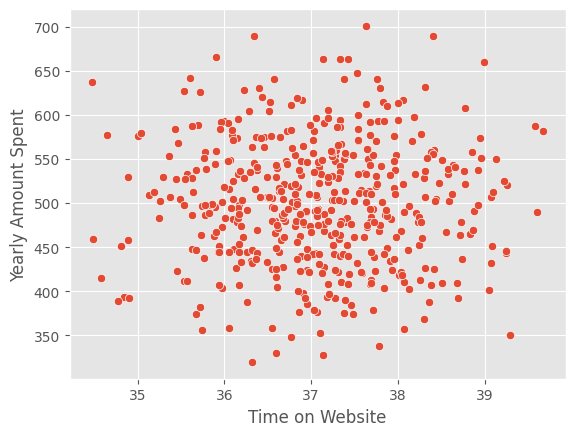

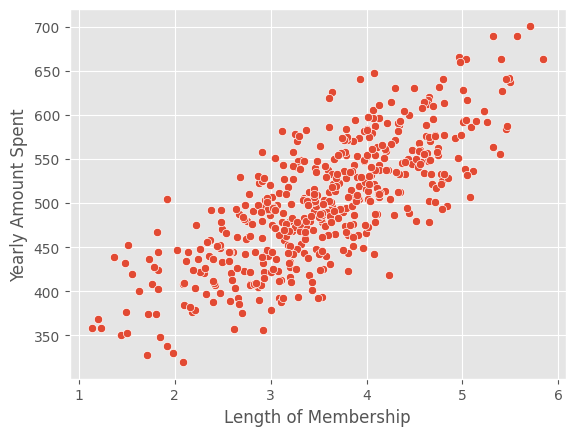

In [32]:
for col in features:
  sns.scatterplot(data=df,x = col,y=target)
  plt.show()

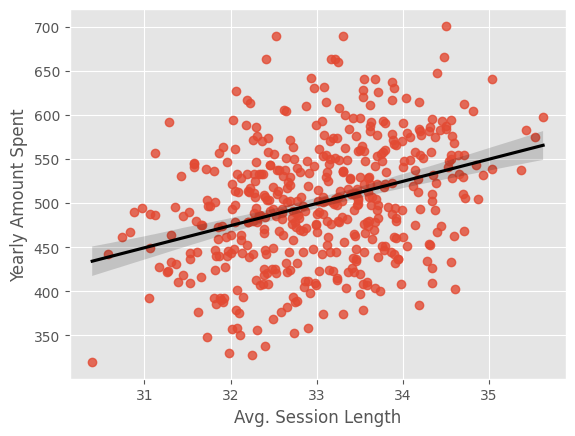

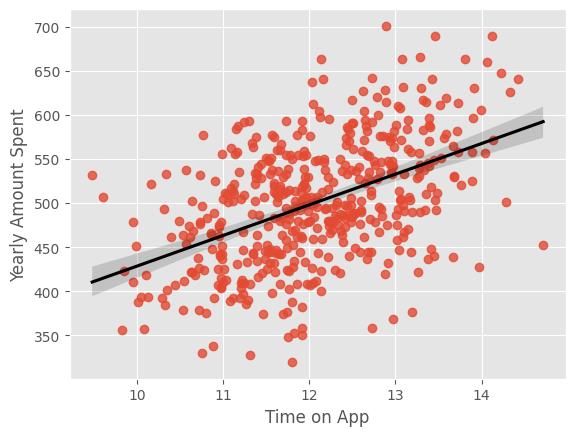

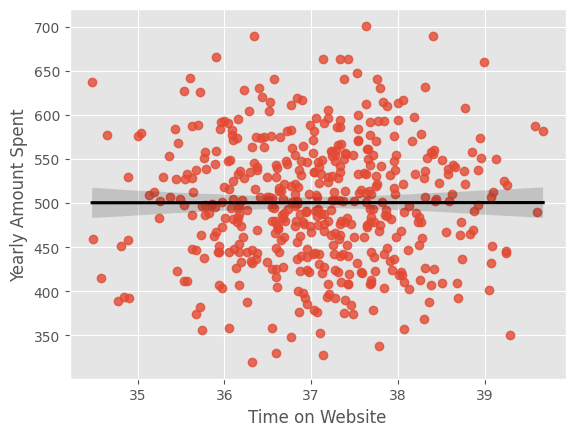

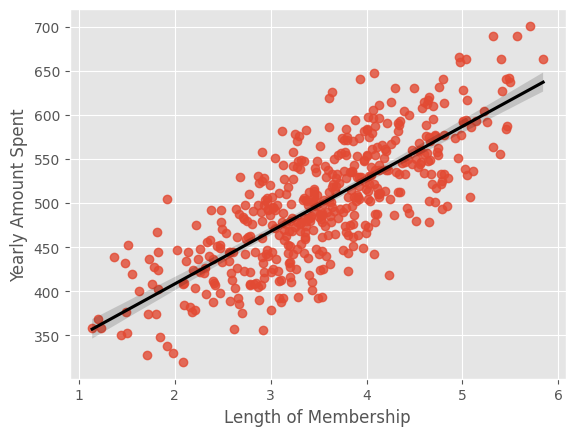

In [33]:
for col in features:
  sns.regplot(data=df,x = col,y=target,line_kws = {'color':'k'})
  plt.show()

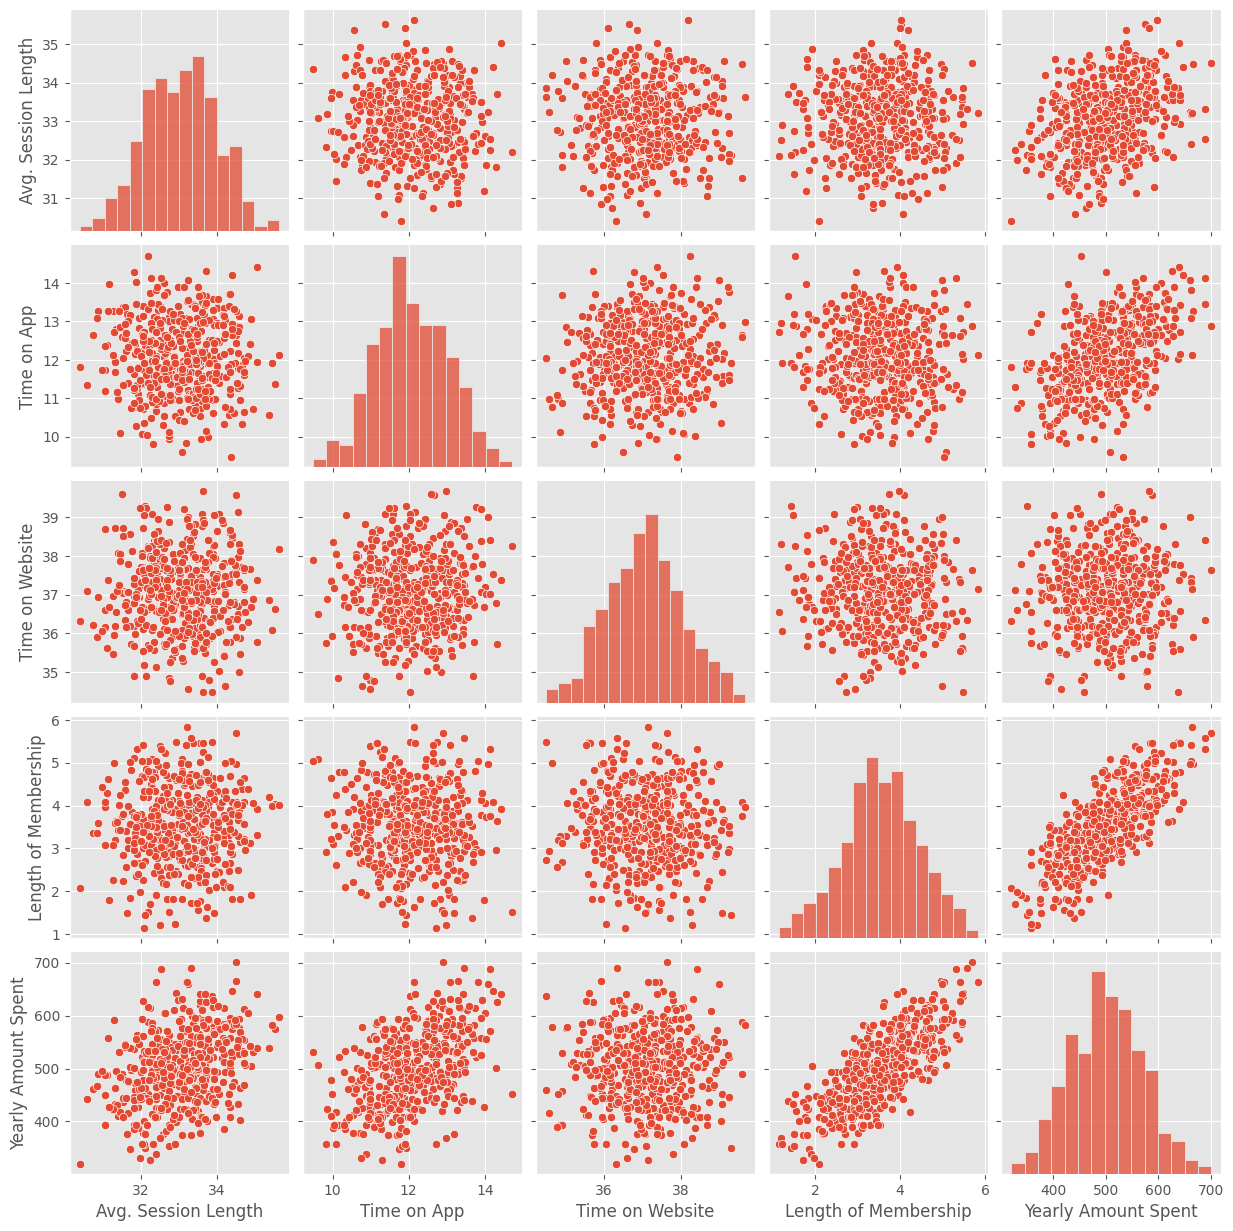

In [34]:
#sns.pairplot(df,palette='YlGnBu')

sns.pairplot(df)
plt.show()

In [35]:
features

['Avg. Session Length',
 'Time on App',
 'Time on Website',
 'Length of Membership']

In [36]:
target

'Yearly Amount Spent'

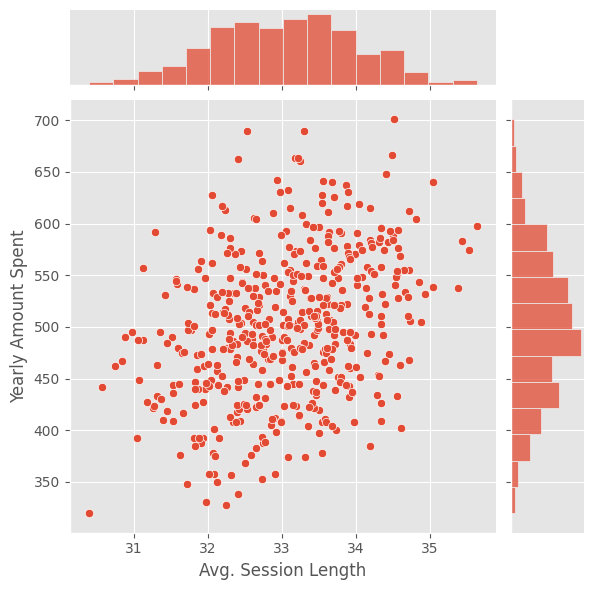

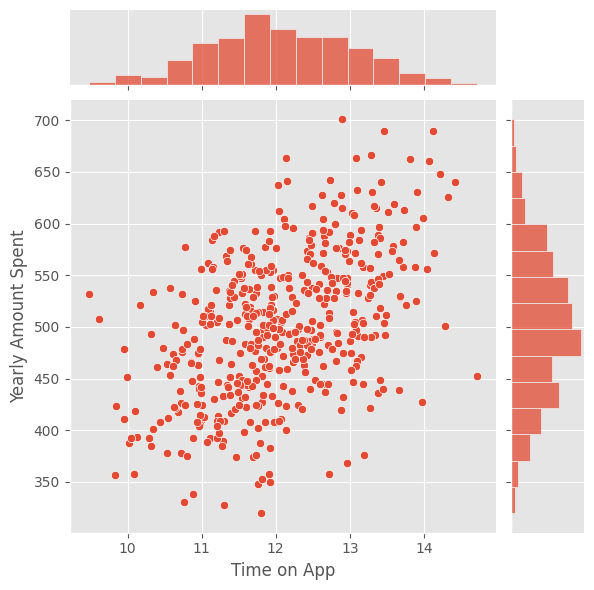

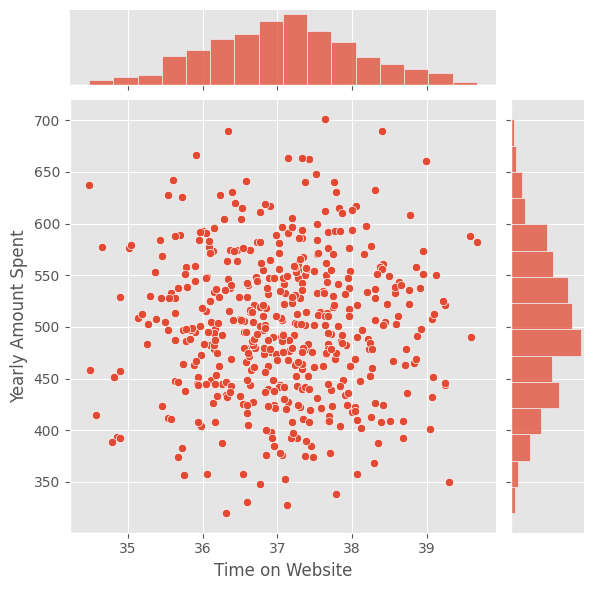

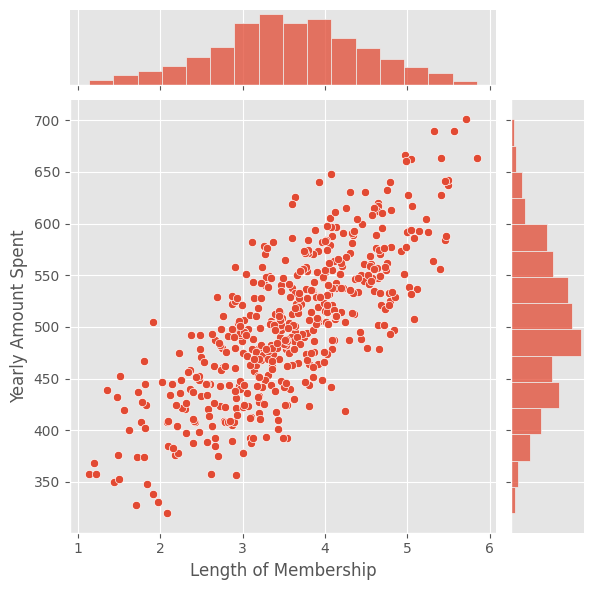

In [37]:
for col in features:
  sns.jointplot(df,x = col,y=target)
  plt.show()

In [38]:
df.columns

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

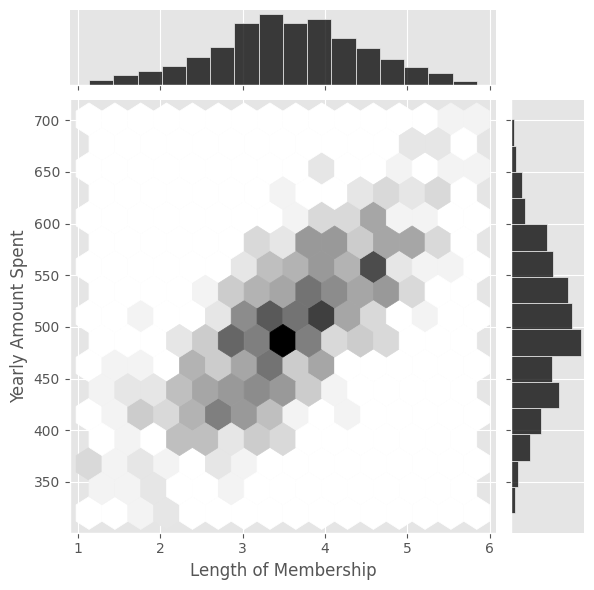

In [39]:
sns.jointplot(data=df,x = 'Length of Membership',y = target,kind='hex',color='k')
plt.show()

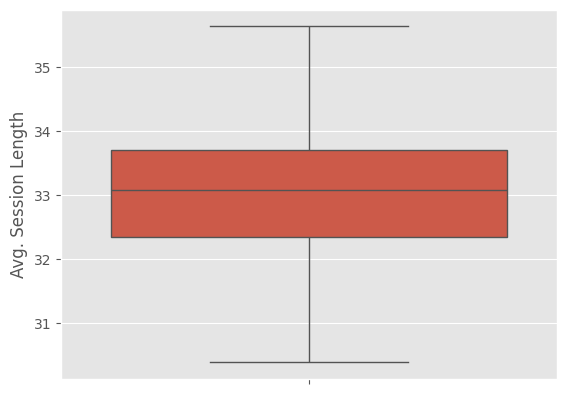

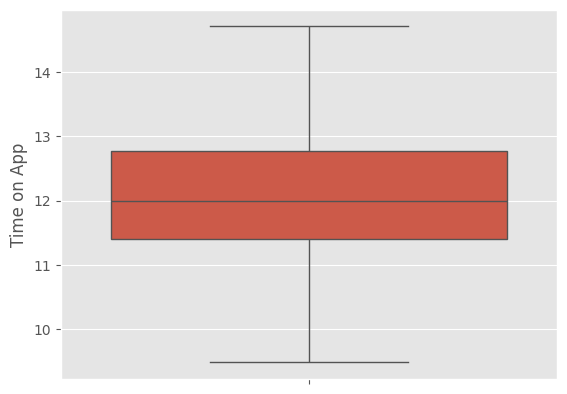

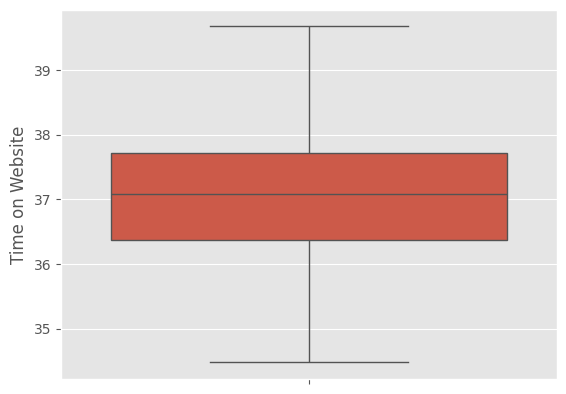

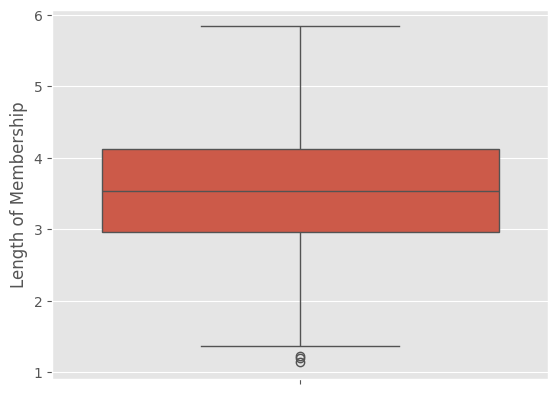

In [40]:
for col in features:
  sns.boxplot(df,y = col)
  plt.show()

#Save the cleaned data

In [41]:
df.to_csv('dataset_clean.csv',index=False)

#Phase 3: Data Preparation


In [42]:
#load the cleaned dataset

df = pd.read_csv('/content/dataset_clean.csv')

df.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


Split dataset into features (X) and target (y).


Apply train-test split (80%-20%) for model training and evaluation.


Standardize/scale numerical features if required (especially for KNN).


In [43]:
x = df.drop(['Yearly Amount Spent'],axis=1)
y = df['Yearly Amount Spent']

In [44]:
x_train,x_test,y_train,y_test = tts(x,y,test_size=0.2)


In [45]:
x_train.shape

(380, 4)

In [46]:
y_train.shape

(380,)

In [47]:
x_test.shape

(96, 4)

In [48]:
y_test.shape

(96,)

In [49]:
scaler = StandardScaler()

x_train=scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [50]:
x_train.mean(axis=0)

array([ 1.71091211e-15,  2.22044605e-16, -4.79382615e-15,  3.10862447e-16])

In [51]:
x_train.std(axis=0)

array([1., 1., 1., 1.])

#Phase 4: Model Development

Build and compare multiple regression models to identify the most accurate predictor.

Models to be Developed:

Linear Regression


K-Nearest Neighbors (KNN) Regressor


Decision Tree Regressor


Random Forest Regressor


XGBoost Regressor




In [52]:

lin_reg = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
xgb = XGBRegressor()

models = [lin_reg,knn,dt,rf,xgb]

models

[LinearRegression(),
 KNeighborsRegressor(),
 DecisionTreeRegressor(),
 RandomForestRegressor(),
 XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)]

In [53]:

scores = []
for model in models:
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  r2 = r2_score(y_test,y_pred)
  mae = mean_absolute_error(y_test,y_pred)
  mape = mean_absolute_percentage_error(y_test,y_pred)

  scores.append((model.__class__.__name__,r2,mae,mape))

scores

[('LinearRegression',
  0.9769922551040401,
  8.294044507980267,
  0.017110283960060955),
 ('KNeighborsRegressor',
  0.9108056198765019,
  16.34287634025194,
  0.03321233048995606),
 ('DecisionTreeRegressor',
  0.8497743352828393,
  21.676183862919718,
  0.04389194743108902),
 ('RandomForestRegressor',
  0.9394988255757637,
  13.520969766681164,
  0.027651386583738852),
 ('XGBRegressor',
  0.9279928290161326,
  14.352432687284404,
  0.028800115984110808)]

| Model                 | R² Score | MAE    | MAPE    |
| --------------------- | -------- | ------ | ------- |
| LinearRegression      | 0.976992 | 8.294  | 0.01711 |
| KNeighborsRegressor   | 0.910806 | 16.343 | 0.03321 |
| DecisionTreeRegressor | 0.849774 | 21.676 | 0.04389 |
| RandomForestRegressor | 0.939499 | 13.521 | 0.02765 |
| XGBRegressor          | 0.927993 | 14.352 | 0.02880 |


- looking at the table we can clearly see Linear Regression model outperforms all the other major models indicating that the data is linear in nature

#Phase 5: Model Evaluation


#Create the Linear Regression Model

In [54]:
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
r2 = r2_score(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
mape = mean_absolute_percentage_error(y_test,y_pred)

print(mae)

print(r2)

print(mape)

8.294044507980267
0.9769922551040401
0.017110283960060955


#scatterplot between y_test and y_pred

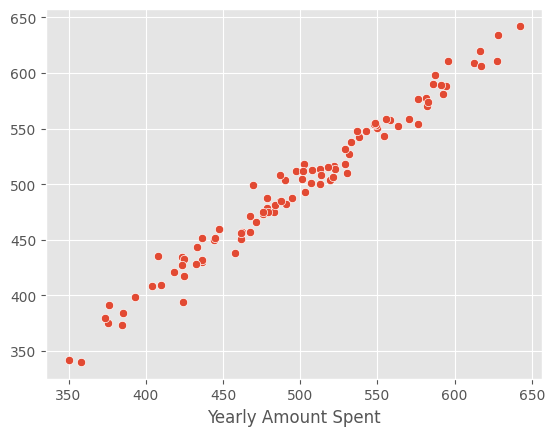

In [55]:
sns.scatterplot(x = y_test,y=y_pred)
plt.show()

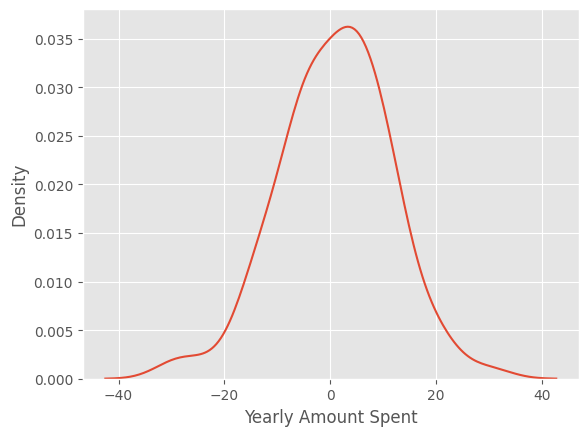

In [56]:
residuals = y_test-y_pred

sns.kdeplot(residuals)
plt.show()

#Phase 6: Feature Importance and Interpretation


In [57]:
model.coef_

array([24.15428505, 36.9981604 ,  0.2260599 , 54.03455239])

In [58]:
x.columns

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership'],
      dtype='object')

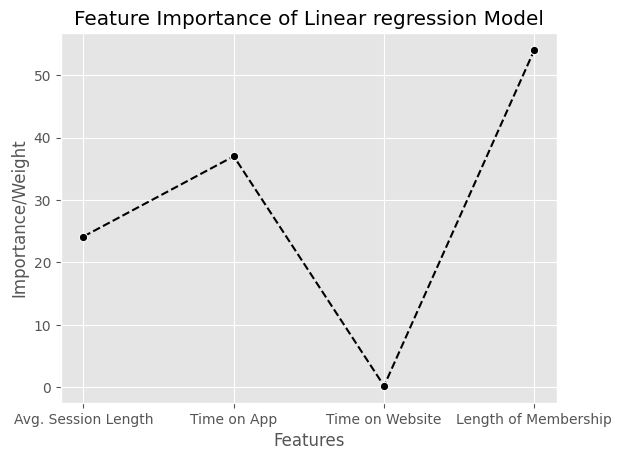

In [64]:
sns.lineplot(x = x.columns,y = model.coef_,marker = 'o',color='k',ls = '--')
plt.title('Feature Importance of Linear regression Model')
plt.xlabel('Features')
plt.ylabel('Importance/Weight')
plt.show()

- Length of Membership has the highest importance followed by Time on App and Avg session Length while Time on Website has very negligible importance

#Highlight the relative importance of Time on App vs Time on Website.
- Its clearly evident from the above graph that the Time on App feature has very high contribution or impact on the Yearly Amount Spent as compared to Time on Website

As Time on App has higher influence: focus on app development, push notifications, and UX optimization.